## Notebook:

In [1]:
print("Hello World")

Hello World


In [2]:
365*24*60*60

31536000

In [3]:
_/ 1e6

31.536

In [4]:
x = 4 + 3
print(x)

7


### PANDAS:

In [5]:
import pandas as pd

In [6]:
ser = pd.Series(data=[10,'foo',20,30,40,50], index=['Bijay','Hari','Kalyan','Manoj','Ramchandra','Prakash'])
print(ser)

Bijay          10
Hari          foo
Kalyan         20
Manoj          30
Ramchandra     40
Prakash        50
dtype: object


In [7]:
ser.index

Index(['Bijay', 'Hari', 'Kalyan', 'Manoj', 'Ramchandra', 'Prakash'], dtype='object')

In [8]:
ser['Bijay']

10

In [9]:
ser.loc['Bijay']

10

In [10]:
ser.loc[['Bijay','Manoj']]

Bijay    10
Manoj    30
dtype: object

In [11]:
'Hari' in ser

True

In [12]:
ser.iloc[2]

20

In [13]:
ser

Bijay          10
Hari          foo
Kalyan         20
Manoj          30
Ramchandra     40
Prakash        50
dtype: object

In [14]:
ser*2

Bijay             20
Hari          foofoo
Kalyan            40
Manoj             60
Ramchandra        80
Prakash          100
dtype: object

In [15]:
ser[['Bijay','Ramchandra']]**2

Bijay          100
Ramchandra    1600
dtype: object

## Pandas DataFrame:

pandas DataFrame is a 2-dimensional labeled data structure.

### Create DataFrame from dictionary of Python Series

In [16]:
d = {'one': pd.Series([100.,200.,300.],index=['apple','ball','clock']),
    'two':pd.Series([111.,222.,333.,444.],index=['apple','ball','cerill','dancy'])}

In [17]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,444.0


In [18]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [19]:
df.columns

Index(['one', 'two'], dtype='object')

In [20]:
pd.DataFrame(d,index=['dancy','ball','apple'])

,one,two
dancy,NaN,444.0
ball,200.0,222.0
apple,100.0,111.0


In [21]:
pd.DataFrame(d,index=['dancy','ball','apple'],columns=['two','five'])

,two,five
dancy,444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


#### Create DataFrame from list of Python dictionaries

In [22]:
data = [{'alex':1, 'joe':2}, {'ema':5,'dora':10,'alice':20}]

In [23]:
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [24]:
pd.DataFrame(data,index=['orange','red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [25]:
pd.DataFrame(data,columns=['joe','dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


### Basic DataFrame operations

In [26]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,444.0


In [27]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [28]:
df ['three']=df['one']*df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,444.0,NaN


In [29]:
df['flag'] = df['one']>250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,444.0,NaN,False


In [30]:
 three = df.pop('three')

In [31]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [32]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,444.0,False


In [33]:
del df['two']

In [34]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [35]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [36]:
df.insert(2,'copy_of_one',df['one'])

In [37]:
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [38]:
df['one_upper_half'] = df['one'][:2]

In [39]:
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


## read_json / read_html / read_sql_query / read_sql_table

### Case Study: Movie Data Analysis

This notebook uses a dataset from the movieLens website.

In [40]:
movies = pd.read_csv(r'C:\Users\pande\Downloads\ml-20m\ml-20m\movies.csv',sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Timestamps represent seconds since midnight coordinated universal time (UTC)

In [41]:
tags = pd.read_csv(r'C:\Users\pande\Downloads\ml-20m\ml-20m\tags.csv',sep=',')
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [42]:
ratings = pd.read_csv(r'C:\Users\pande\Downloads\ml-20m\ml-20m\movies.csv',sep=',', parse_dates={'datetime':[0,1]},index_col='datetime')
ratings.head()

,genres
datetime,
1 Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2 Jumanji (1995),Adventure|Children|Fantasy
3 Grumpier Old Men (1995),Comedy|Romance
4 Waiting to Exhale (1995),Comedy|Drama|Romance
5 Father of the Bride Part II (1995),Comedy


# DATA STRUCTURES

### Series

In [43]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [44]:
print(row_0)

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object


In [45]:
row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [46]:
row_0['userId']

18

In [47]:
'rating' in row_0

False

In [48]:
'timestamp' in row_0

True

In [49]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [50]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [51]:
#Extract row 0,11,2000 from DataFrame

tags.iloc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


## Descriptive Statics

let's look how the ratings are distributed

In [52]:
ratings = pd.read_csv(r'C:\Users\pande\Downloads\ml-20m\ml-20m\ratings.csv',sep=',')

In [53]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [54]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [55]:
ratings.mean()

userId       6.904587e+04
movieId      9.041567e+03
rating       3.525529e+00
timestamp    1.100918e+09
dtype: float64

In [56]:
ratings['rating'].mean()

3.5255285642993797

In [57]:
ratings['rating'].max()

5.0

In [58]:
ratings['rating'].min()

0.5

In [59]:
ratings['rating'].std()

1.051988919275684

In [60]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [61]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


In [62]:
filter_1 = ratings ['rating'] > 5
filter_1.any()

False

In [63]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

## DATA CLEANING

In [64]:
movies = pd.read_csv(r'C:\Users\pande\Downloads\ml-20m\ml-20m\movies.csv',sep=',')

In [65]:
movies.shape

(27278, 3)

In [66]:
# is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [67]:
ratings.shape

(20000263, 4)

In [68]:
# is any row NULL ?

ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [69]:
tags.shape

(465564, 4)

In [70]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [71]:
tags = tags.dropna()

In [72]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [73]:
tags.shape

(465548, 4)

## DATA VISUALIZATION :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA046E80F0>]],
      dtype=object)

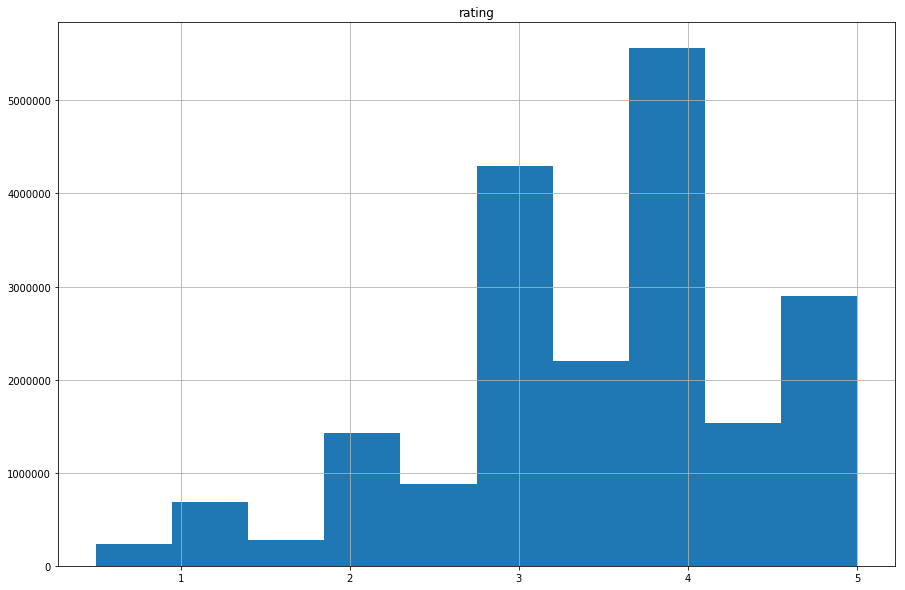

In [74]:
%matplotlib inline

ratings.hist(column='rating',figsize=(15,10))

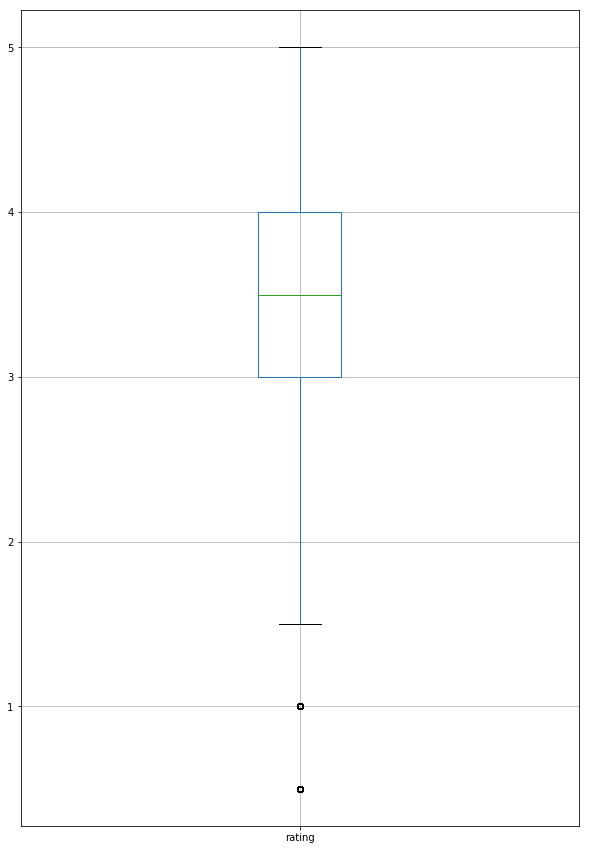

In [75]:
ratings.boxplot(column='rating', figsize=(10,15))

### Slicing out columns

In [76]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [77]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [78]:
ratings[1000:1010]

,userId,movieId,rating,timestamp
1000,11,527,4.5,1251170861
1001,11,531,4.5,1230782539
1002,11,541,4.5,1230787503
1003,11,546,5.0,1230788928
1004,11,551,5.0,1230853957
1005,11,586,4.0,1230859027
1006,11,587,4.5,1230858969
1007,11,588,5.0,1251170867
1008,11,589,4.5,1230788848
1009,11,592,4.5,1230789445


In [79]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

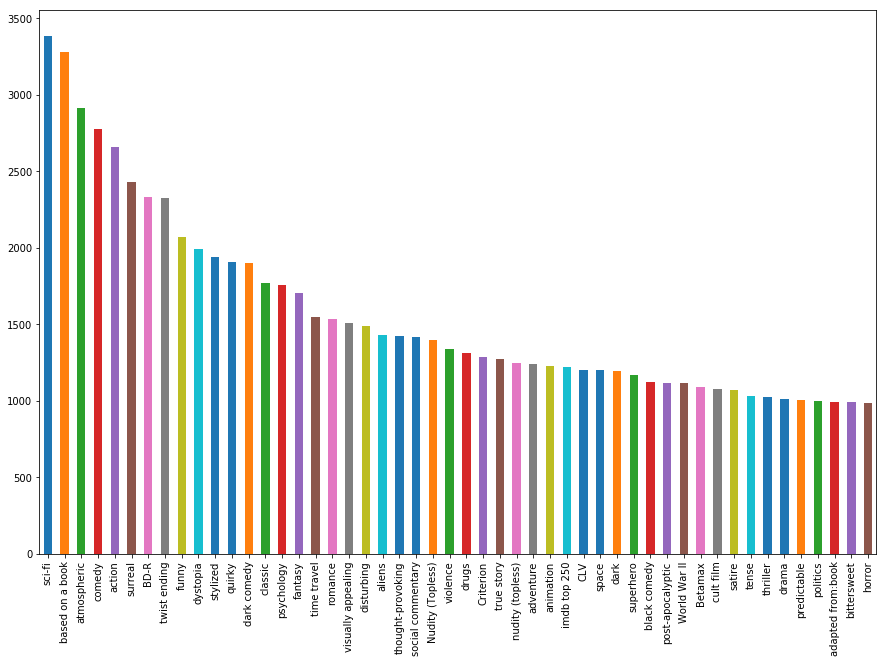

In [80]:
tag_counts[:50].plot(kind='bar', figsize=(15,10))

## Filters for Selecting Rows

In [81]:
is_highly_rated = ratings['rating']>= 4.0
ratings[is_highly_rated][30:40]

,userId,movieId,rating,timestamp
68,1,2021,4.0,1112485929
69,1,2100,4.0,1112485955
70,1,2118,4.0,1094786092
71,1,2138,4.0,1112485789
72,1,2140,4.0,1112485705
73,1,2143,4.0,1112485951
74,1,2173,4.0,1112485887
75,1,2174,4.0,1112485843
76,1,2193,4.0,1112485753
79,1,2288,4.0,1094786077


In [82]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:11]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical


## Group By and Aggregate

In [83]:
rating_count = ratings[['rating','movieId']].groupby('rating').count()
rating_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [84]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [85]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


## Merge DataFrames

In [86]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [87]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [88]:
t = movies.merge(tags,on='movieId', how = 'inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


## Combine aggregation, merging, and filters to get useful analytics:

In [89]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating,timestamp
0,1,3.921240,1.052654e+09
1,2,3.211977,1.037616e+09
2,3,3.151040,9.596480e+08
3,4,2.861393,9.242144e+08
4,5,3.064592,9.620161e+08


In [90]:
box_office = movies.merge(avg_ratings, on = 'movieId', how = 'inner')
box_office.tail()

,movieId,title,genres,rating,timestamp
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0,1.427744e+09
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0,1.427745e+09
26741,131258,The Pirates (2014),Adventure,2.5,1.427745e+09
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0,1.427745e+09
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0,1.427748e+09


In [91]:
is_highly_rated = box_office['rating'] >4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating,timestamp
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0,1.427552e+09
26665,131027,But Forever in My Mind (1999),Comedy|Drama,4.5,1.427612e+09
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0,1.427651e+09
26682,131082,Playground (2009),(no genres listed),4.5,1.427655e+09
26729,131176,A Second Chance (2014),Drama,4.5,1.427692e+09


In [92]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][5:]

,movieId,title,genres,rating,timestamp
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.667713,9.571647e+08
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,2.619766,9.772182e+08
17,18,Four Rooms (1995),Comedy,3.373631,1.021907e+09
18,19,Ace Ventura: When Nature Calls (1995),Comedy,2.607412,1.030183e+09
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,2.880754,9.737709e+08
20,21,Get Shorty (1995),Comedy|Crime|Thriller,3.581689,9.592449e+08
37,38,It Takes Two (1995),Children|Comedy,2.857790,9.941617e+08
38,39,Clueless (1995),Comedy|Romance,3.413632,9.944503e+08
44,45,To Die For (1995),Comedy|Drama|Thriller,3.384361,9.536065e+08
51,52,Mighty Aphrodite (1995),Comedy|Drama|Romance,3.541148,9.407722e+08


## Vectorized String Operations

In [93]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Split 'genres' into multiple columns

In [94]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [95]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


### add a new column for comedy genre flag

In [96]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [97]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


### extract year from title e.g. (1995)

In [98]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand=True)

In [99]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


### sort Tables in Chronological Order

In [100]:
tags.sort_values(by='timestamp', ascending = True)[:10]

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399
333921,100371,47,brad pitt,1135429412
333922,100371,47,morgan freeman,1135429412
333937,100371,4011,guy ritchie,1135429431
333936,100371,4011,brad pitt,1135429431
333920,100371,32,bruce willis,1135429442


In [101]:
tags['parsed_time']=pd.to_datetime(tags['timestamp'],unit='s')

#### Data Type datetime64[ns] maps to either M8[ns] depending on the hardware

In [102]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [103]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


#### Selecting rows based on timestamps

In [104]:
greater_than_t = tags['parsed_time']>'2015-02-01'
selected_rows = tags[greater_than_t]
tags.shape, selected_rows.shape

((465548, 5), (12130, 5))

### Sorting the table using the timestamp:

In [105]:
tags.sort_values(by='parsed_time',ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


### Average movie ratings over time

#### Are Movie ratings related to the year of lunch?

In [106]:
average_rating = ratings[['movieId','rating']].groupby('movieId',as_index=False)
average_rating.head()

,movieId,rating
0,2,3.5
1,29,3.5
2,32,3.5
3,47,3.5
4,50,3.5
5,112,3.5
6,151,4.0
7,223,4.0
8,253,4.0
9,260,4.0
